In [1]:
import sys
import os
sys.path.append(os.path.abspath("../"))

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.manifold import TSNE

In [3]:
tensor = torch.load('../data/resnet50_tensor.pt').numpy().copy()
print('tensor finished')
img_paths = pd.read_csv('../data/anotation_new.csv').iloc[:, 0]
print('img_path finished')
with open('./category.txt', 'r') as f:
    orginal_label = f.read().split('\n')
print('label finished')

tensor finished
img_path finished
label finished


In [7]:
import numpy as np

p = torch.ones(len(tensor))
index = p.multinomial(num_samples=200000, replacement=False)
sampling_tensor = tensor[index]
sampling_label = np.array(orginal_label)
sampling_label = sampling_label[index]

In [10]:
# filtering
mask = np.vectorize(lambda x: x.split(' × ')[0] in ["ジャケット", "トップス", "コート", "ニット", "タンクトップ", "ブラウス", "Tシャツ", "カーディガン", "ダウンジャケット", "パーカー"])(sampling_label)
print(len(mask), len(sampling_label), len(sampling_tensor))
filtering_tensor = sampling_tensor[mask]
filtering_label = sampling_label[mask]
print(len(mask), len(filtering_label), len(filtering_tensor))
# print(len(q))

200000 200000 200000
200000 42458 42458


In [11]:
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
X_embedded = tsne.fit_transform(filtering_tensor)
X = pd.DataFrame(X_embedded, columns = ['col1', 'col2'])

In [18]:
print(mask[:10])

[False  True False  True False False False  True False  True]


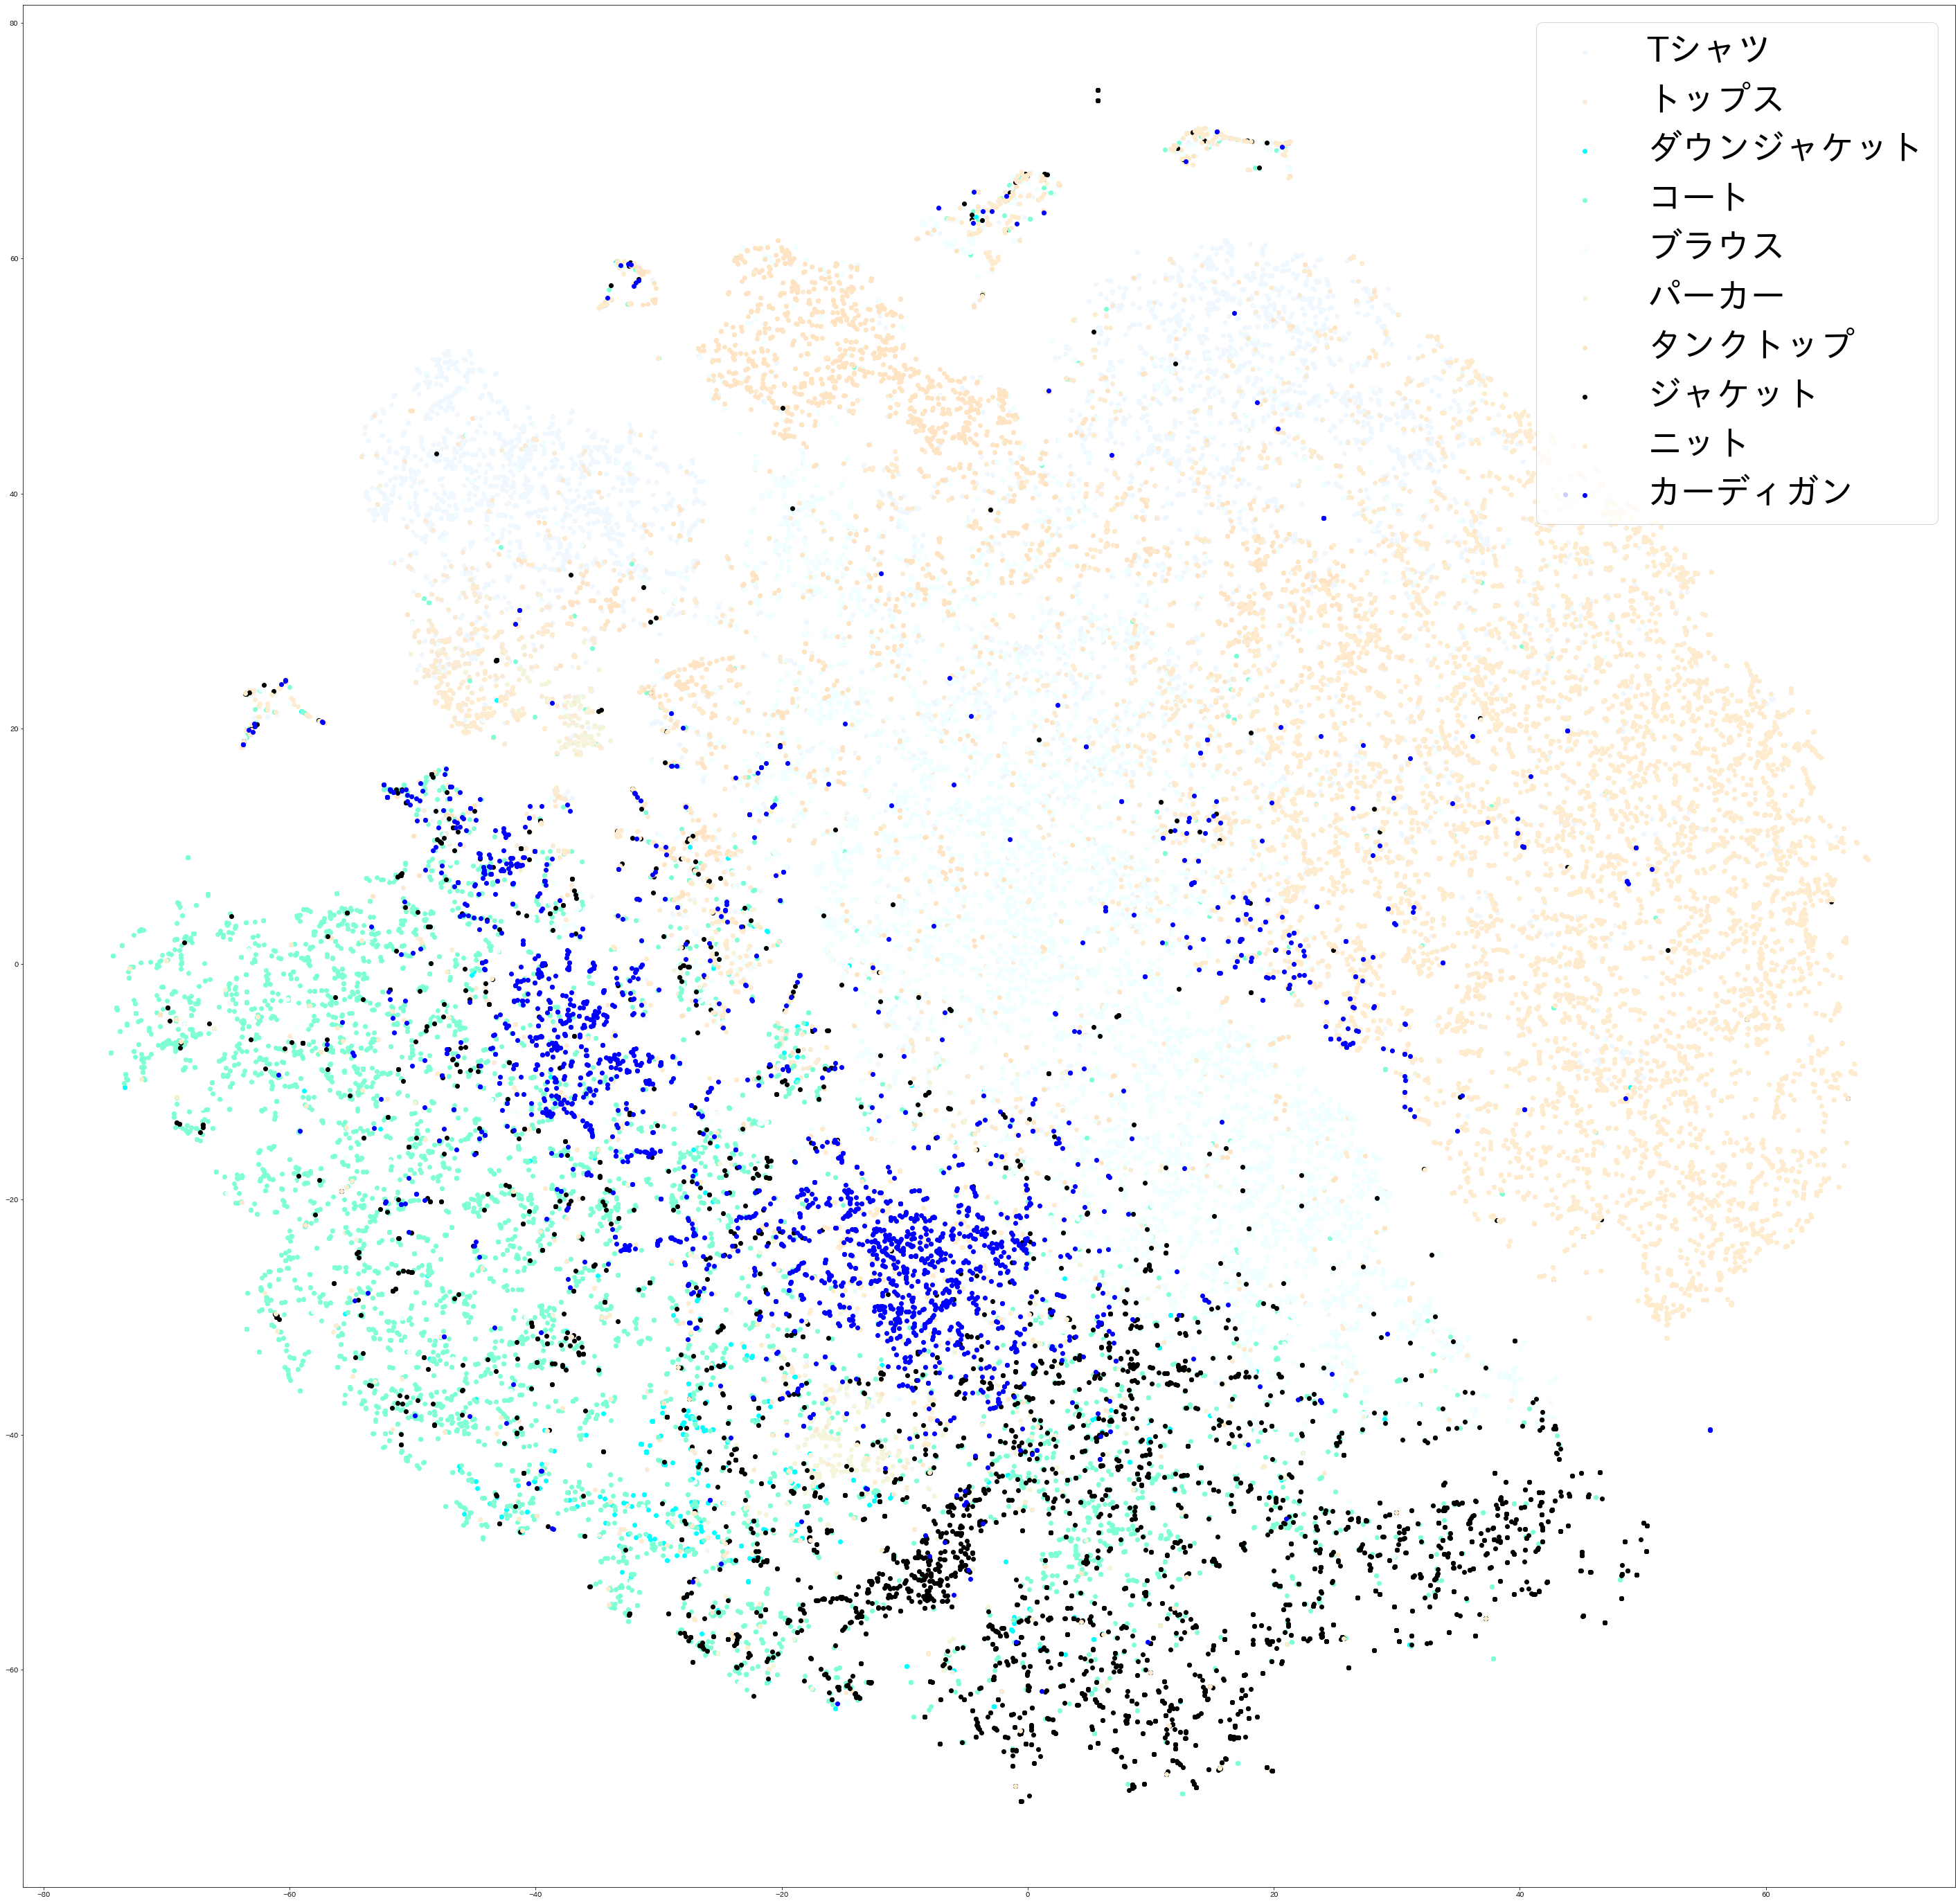

In [25]:
import numpy as np
import matplotlib
import japanize_matplotlib
fig = plt.figure(figsize = (50, 50))
colors = list(matplotlib.colors.CSS4_COLORS.values())
category_list = list(set(list(map(lambda x: x.split(' × ')[0], filtering_label))))
# category_list = list(set(filtering_label))
for i, v in enumerate(category_list):
    color_filtering_label = np.array(list(map(lambda x: x.split(' × ')[0], list(filtering_label))))
    category_mask = color_filtering_label == np.array(v)
    # category_mask = filtering_label == np.array(v)
    tmp_df = X[category_mask]
    # print(tmp_df)
    plt.scatter(tmp_df['col1'],
                tmp_df['col2'],
                label = v,
                color = colors[i])

plt.legend(fontsize = 50)
fig.savefig('only_tops_with_kind.png')

In [16]:
category_list

['ロングスカート × 赤（レッド）',
 'ニット × オレンジ',
 'サングラス × 赤（レッド）',
 'クラッチバッグ × 緑（グリーン）',
 'ネイル × ベージュ',
 'メガネ × 白（ホワイト）',
 'ジャケット × 青（ブルー）',
 'トートバッグ × 青（ブルー）',
 '小物 × 黄色（イエロー）',
 'パンプス × 黒（ブラック）',
 'サンダル × 灰色（グレー）',
 'リュック × ベージュ',
 'ジャケット × ピンク',
 'チュニック × ベージュ',
 'ボディケア × ベージュ',
 'リュック × 黒（ブラック）',
 'ニット × 黒（ブラック）',
 'ステーショナリー × 黄色（イエロー）',
 'ワンピース × オレンジ',
 'トップス × 紫（パープル）',
 '小物 × 茶色（ブラウン）',
 'パーカー × 紫（パープル）',
 'ロングスカート × ベージュ',
 'バッグ × オレンジ',
 'コート × 黒（ブラック）',
 'サングラス × ピンク',
 'ストール × 白（ホワイト）',
 'ルームウェア × 白（ホワイト）',
 'ベルト × ベージュ',
 'メガネ × ピンク',
 'リング × 白（ホワイト）',
 'ロングスカート × 青（ブルー）',
 'ショートパンツ × 灰色（グレー）',
 'インテリア × 灰色（グレー）',
 'ハット × 黄色（イエロー）',
 'ハンドバッグ × 白（ホワイト）',
 'トップス × 赤（レッド）',
 'レッグウェア × ベージュ',
 'サングラス × 紫（パープル）',
 'ストール × オレンジ',
 'クラッチバッグ × 灰色（グレー）',
 'ショートパンツ × オレンジ',
 '傘 × オレンジ',
 'パンプス × 灰色（グレー）',
 'Tシャツ × 白（ホワイト）',
 'Tシャツ × 青（ブルー）',
 'サンダル × ベージュ',
 'スカート × 茶色（ブラウン）',
 'ピアス × 黄色（イエロー）',
 'ピアス × ピンク',
 'ボストンバッグ × 黄色（イエロー）',
 '財布 × 黒（ブラック）',
 ' × 灰色（グレー）',
 'ハット × 茶色（ブラウン）',
 'フレグランス × 黒

In [35]:
print(len(category_list))

695
